Diccionario:

-	Customer ID	: Código identificador del clienteo
- Gender		: Género
- Senior Citizen	: Esta o no jubilado
- Pareja		: Tiene o no tiene pareja
- Dependents	: Tiene o no dependientes
- Tenure		: Tiempo de permanencia
- PhoneService	: Tiene o no servicio telefónico
- MultipleLines	: Tiene multiples líneas, una sola o ninguna.
- IntenetService	: Tipo de servicio de internet que posee
- OnlineSecurity	: Tiene o no tiene seguridad en línea
- OnlineBackup	: Tiene o no tiene copia de seguridad en línea.
- DeviceProtection: Tiene o no tiene protección del dispositivo
- TechSuport	: Requirio o no soporte técnico
- StreamingTV	:  Tiene o no servicio de streaming TV
- StreamingMovies: Tiene o no servicio de streaming Movies
- Contract	: Tipo de contrato (mensual, anual, bianual)
- PaperlessBilling	: Tiene o no facturación electrónica
- PaymentMethod: Forma de pago (cheque electrónico, cheque por mail, pago con cuenta bancaria, pago con tarjeta de crédito)
- MonthlyCharges: Cargos mensuales
- TotalCharges	: Cargos totales
- numAdminTickets: Número de consultas de administrativas
- numTechTickets: Número de consultas técnicas
- Churn		: Cliente permanece o se fugo


## **1.- Preprocesamiento**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files ##Importando archivo
uploaded = files.upload()

Saving Telecom Churn Rate Dataset.xlsx to Telecom Churn Rate Dataset.xlsx


In [ ]:
df = pd.read_excel('/content/Telecom Churn Rate Dataset.xlsx')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [ ]:
df.info()   ## VISUALIZACIÓN MACRO DE LOS DATOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*Verificación de Duplicados*

In [ ]:
dup = df['customerID'].duplicated()
dup.value_counts()

False    7043
Name: customerID, dtype: int64

*Conteo de clientes que se fugaron (Churn)*

In [ ]:
df['Churn'].value_counts()*100/(len(df['Churn']))

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

## `Nota: En este caso se observa un desbalance poco considerable: 73.5 % - 23.5 %`


*Binarización de la variable objetivo en una nueva columna llamado: TARGET*

In [ ]:
df['TARGET'] = np.where(df['Churn']== 'Yes',1,0)

In [ ]:
df.drop(columns=['Churn'], inplace=True)

In [ ]:
df.drop(columns=['customerID'], inplace=True)

# **2. Transformación**

*Verificación de las variables y codificación (binaria, ordinal y one hot encoding)*

In [ ]:
df.gender.value_counts() ##  CODIFICACIÓN BINARIA

Male      3555
Female    3488
Name: gender, dtype: int64

In [ ]:
df.Partner.value_counts() ##  CODIFICACIÓN BINARIA

No     3641
Yes    3402
Name: Partner, dtype: int64

In [ ]:
df.Dependents.value_counts() ##  CODIFICACIÓN BINARIA

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [ ]:
df.PhoneService.value_counts() ##  CODIFICACIÓN BINARIA

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [ ]:
df.MultipleLines.value_counts() ## CODIFICACIÓN ONE HOT ENCODING

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [ ]:
df.InternetService.value_counts() ## CODIFICACIÓN ONE HOT ENCODING

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
df.OnlineSecurity.value_counts() ## CODIFICACIÓN ONE HOT ENCODING

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [ ]:
df.OnlineBackup.value_counts() ## CODIFICACIÓN ONE HOT ENCODING

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [ ]:
df.DeviceProtection.value_counts() ## CODIFICACIÓN ONE HOT ENCODING

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [ ]:
df.TechSupport.value_counts() ## CODIFICACIÓN ONE HOT ENCODING

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [ ]:
df.StreamingTV.value_counts() ## CODIFICACIÓN ONE HOT ENCODING

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [ ]:
df.StreamingMovies.value_counts() ## CODIFICACIÓN ONE HOT ENCODING

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [ ]:
df.Contract.value_counts() ## CODIFICACIÓN ORDINAL

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
df.PaperlessBilling.value_counts() ##  CODIFICACIÓN BINARIA

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [ ]:
df.PaymentMethod.value_counts() ## CODIFICACIÓN ONE HOT ENCODING

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

NOTA: ANTES DE EMPEZAR LA CODIFICACIÓN, SE GUARDA LOS DATOS DEL DATAFRAME DF EN DATASET PARA PODER VISUALIZARLOS LUEGO

In [ ]:
dataset = df ## GUARDO LAS COLUMNAS ANTES DE LA CODIFICACIÓN Y ELIMINACIÓN PARA VISUALIZAR LOS DATOS LUEGO

In [ ]:
## CODIFICACIÓN BINARIA
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [ ]:
## CODIFICACIÓN ORDINAL

df['Contract'] = df['Contract'].map({'Month-to-month':1, 'One year':2, 'Two year': 3})

In [ ]:
## CONVIRTIENDO TOTALCHARGES A UN VALOR NUMERICO
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
## CONTANDO LA CANTIDAD DE VALORES NAN QUE SE OBTUVIERON EN LA COLUMNA
df['TotalCharges'].isna().sum()

11

In [ ]:
## ELIMINANDO LAS FILAS COMPLETAS DEBIDO A LA POCA CANTIDAD: 11
df = df.dropna(subset=['TotalCharges'])

In [ ]:
## APLICANDO ONE HOT ENCODING PARA ASIGNAR VARIABLES NUMERICAS A LAS COLUMNAS CATEGÓRICAS

df = pd.get_dummies(df, drop_first=True)

*Verificación del dataframe luego de las codificaciones.*

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,2,0,56.95,1889.50,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,2,1,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,2,0,42.30,1840.75,...,1,0,1,0,0,0,0,0,0,0
4,0,0,0,0,2,1,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,1.688567,0.592719,64.798208,2283.300441,...,0.343857,0.216155,0.290102,0.216155,0.384386,0.216155,0.388367,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.832934,0.491363,30.085974,2266.771362,...,0.475028,0.411650,0.453842,0.411650,0.486484,0.411650,0.487414,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,18.250000,18.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,0.000000,35.587500,401.450000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,70.350000,1397.475000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,89.862500,3794.737500,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,3.000000,1.000000,118.750000,8684.800000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **3. Análisis exploratorio de los datos**

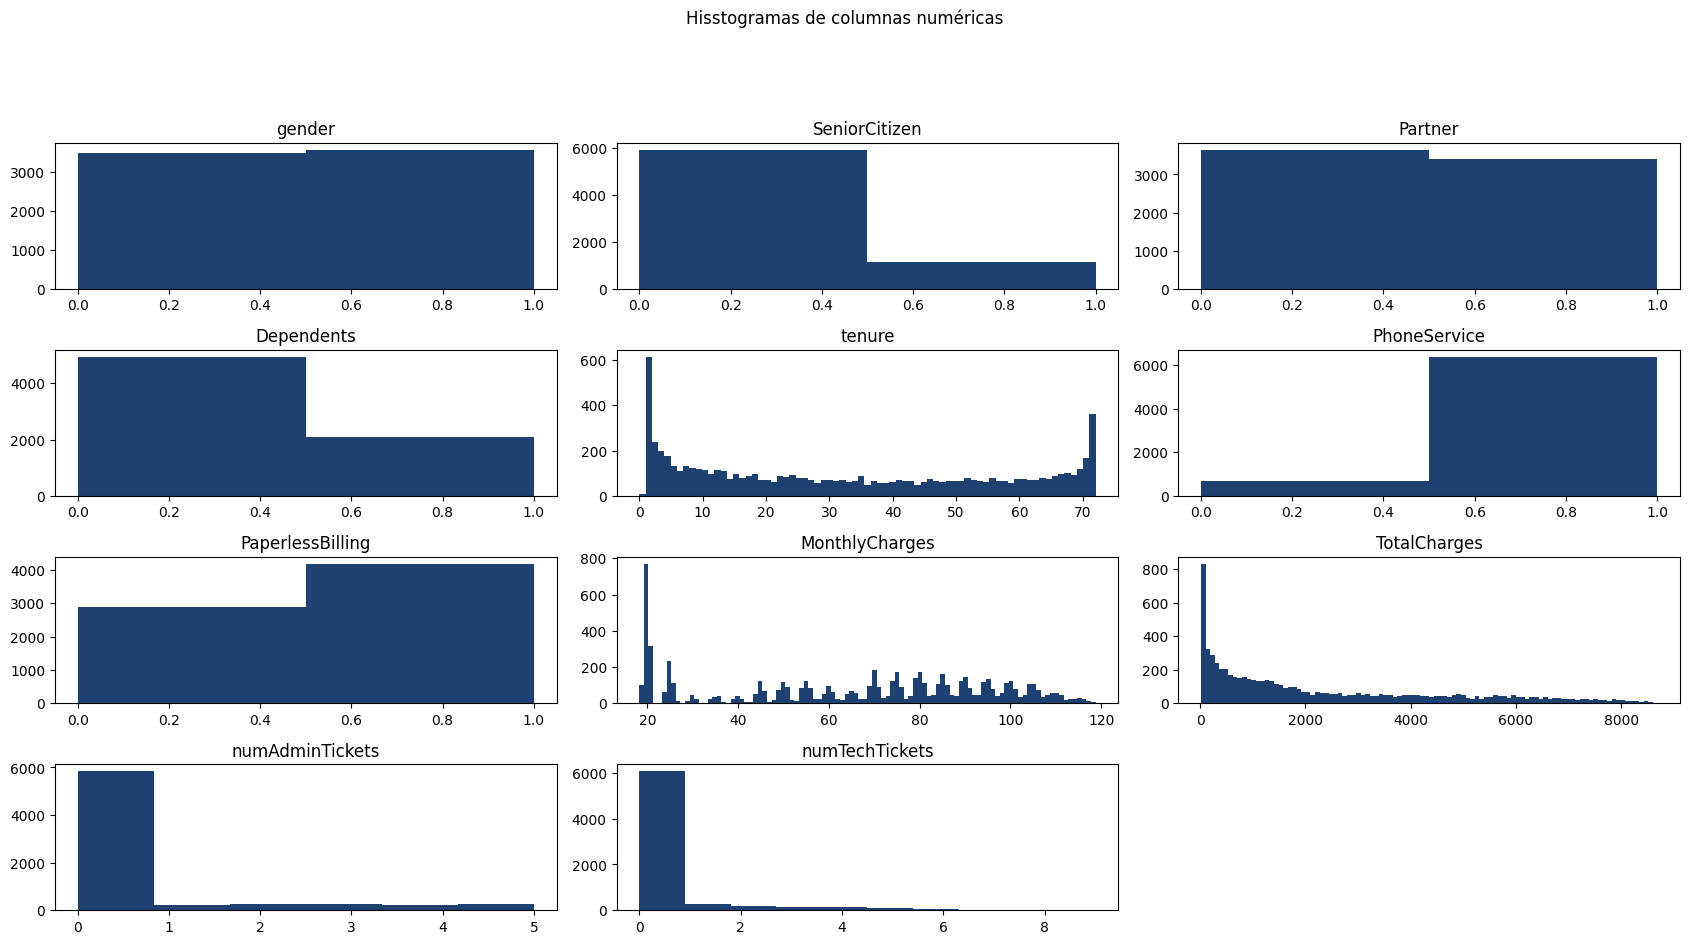

In [ ]:
#Análisis Exploratorio de Datos
#Ploteo de Histograma
import matplotlib.pyplot as plt
dataset2=dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges', 'TotalCharges','numAdminTickets','numTechTickets']]
fig1=plt.figure(figsize=(17,14))
plt.suptitle('Hisstogramas de columnas numéricas\n',horizontalalignment="center")
for i in range(dataset2.shape[1]):
  plt.subplot(6, 3, i+1)
  f = plt.gca()
  f.set_title(dataset2.columns.values[i])

  vals = np.size(dataset2.iloc[:, i].unique())
  if vals >= 100:
      vals = 100

  plt.hist(dataset2.iloc[:, i], bins=vals, color = '#1F4172')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

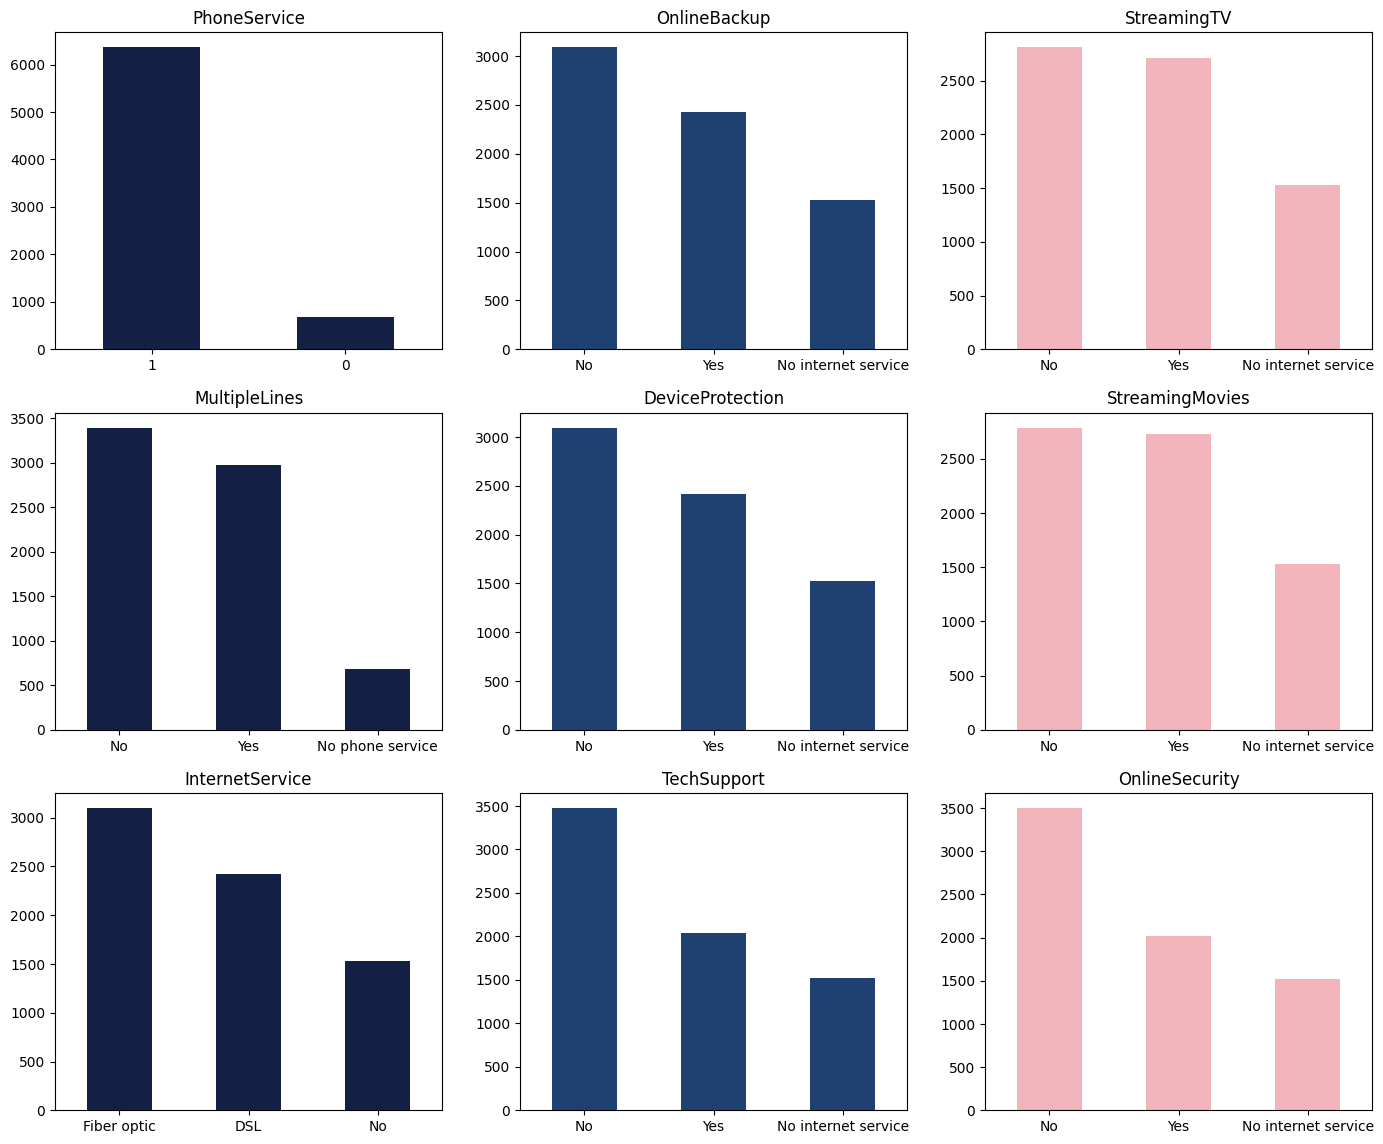

In [ ]:
#Distribucion de las variables categoricas codificadas:
services = ['PhoneService','MultipleLines','InternetService',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','OnlineSecurity']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (17,14))
for i, item in enumerate(services):
    if i < 3:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#132043' )

    elif i >=3 and i < 6:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#1F4172')

    elif i < 9:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#F1B4BB')
    ax.set_title(item)

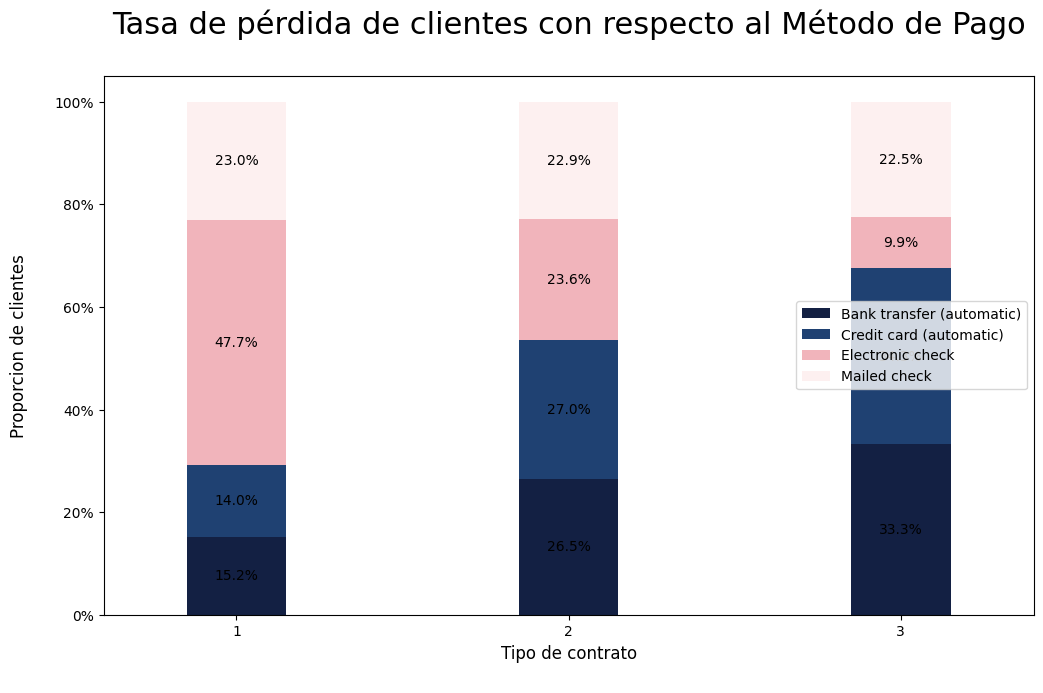

In [ ]:
import matplotlib.ticker as mtick

contract_churn = dataset.groupby(['Contract','PaymentMethod']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#132043','#1F4172', '#F1B4BB' , '#FDF0F0']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proporcion de clientes\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Tipo de contrato\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Tasa de pérdida de clientes con respecto al Método de Pago\n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

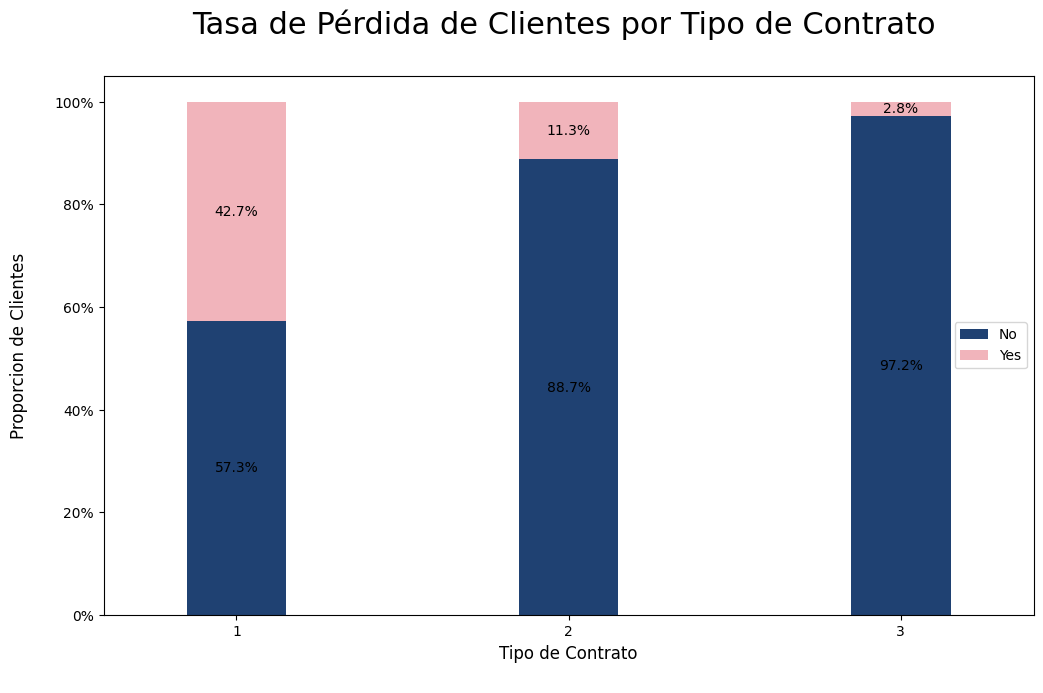

In [ ]:
import matplotlib.ticker as mtick

contract_churn = dataset.groupby(['Contract','TARGET']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#1F4172', '#F1B4BB']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width = 0.3,stacked = True,rot = 0, figsize = (12,7),color = colors)
plt.ylabel('Proporcion de Clientes\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Tipo de Contrato\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Tasa de Pérdida de Clientes por Tipo de Contrato \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

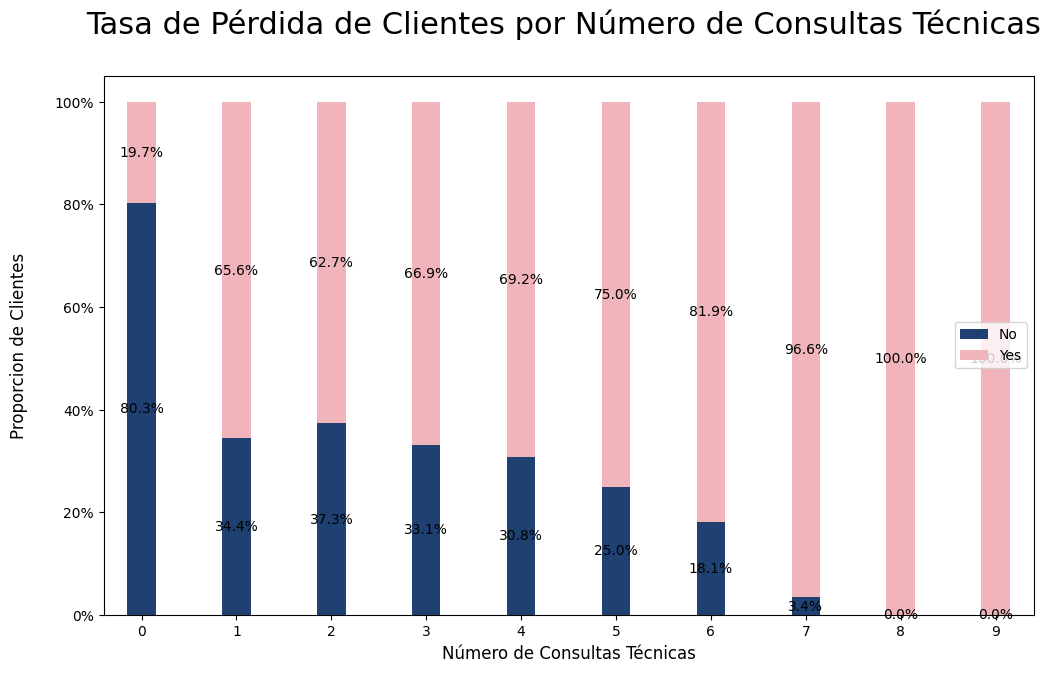

In [ ]:
import matplotlib.ticker as mtick

numtech_churn = dataset.groupby(['numTechTickets','TARGET']).size().unstack()

numtech_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#1F4172', '#F1B4BB']

ax = (numtech_churn.T*100.0 / numtech_churn.T.sum()).T.plot(kind='bar', width = 0.3,stacked = True,rot = 0, figsize = (12,7),color = colors)
plt.ylabel('Proporcion de Clientes\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Número de Consultas Técnicas\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Tasa de Pérdida de Clientes por Número de Consultas Técnicas \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

## **4. Revisión de relación entre las variables**

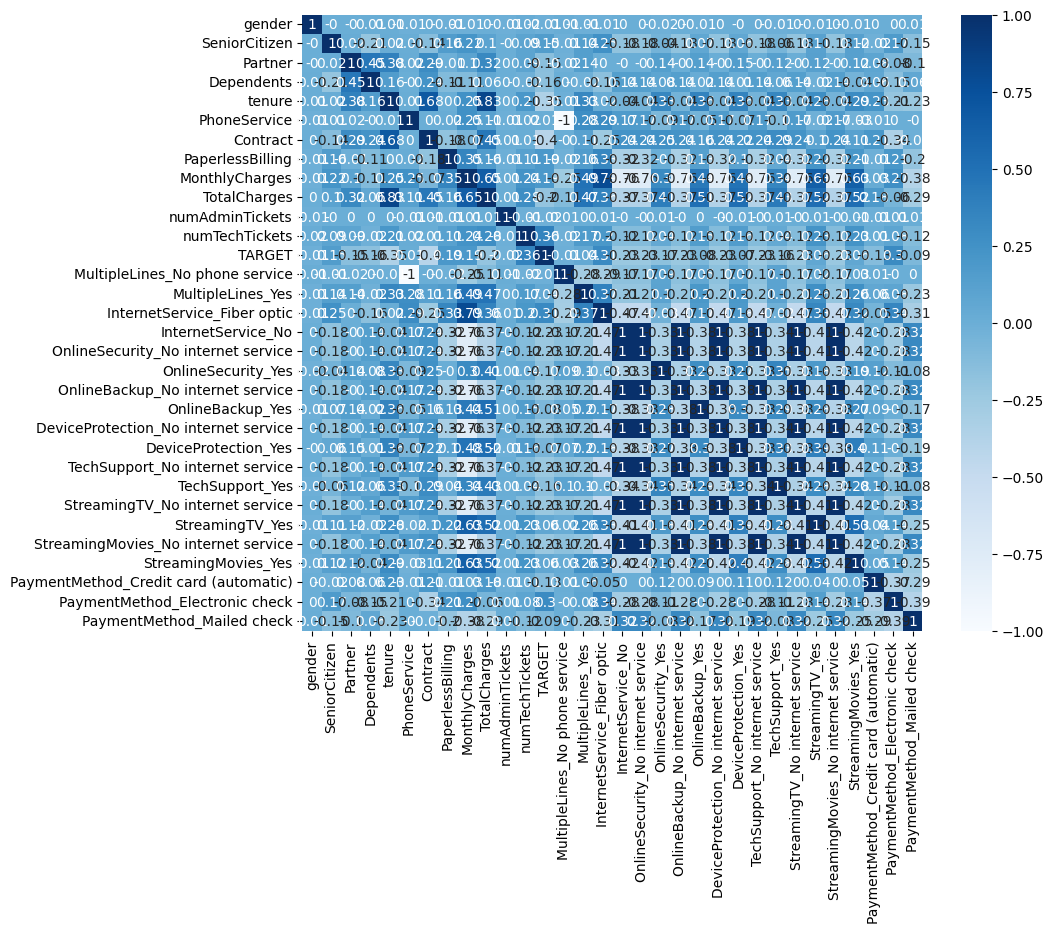

In [ ]:
## VERIFICACIÓN DE LA CORRELACIÓN ENTRE VARIABLES LUEGO DE LA CODIFICACIÓN.

## NOTA: CÓDIGO EXTRAÍDO DEL "Taller Práctico: Clasificación, selección de modelos, optimización" - PROFESOR: MSc. Luis Muroya Tokushima.
##        CURSO: FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO. Sesión 04-10-2023.

import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.corr().apply(lambda x: round(x,2))
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,
            annot=True,
            cmap='Blues')
plt.show()

## Nota: Se observa correlación de 1 entre la variable Internetservice_No y las variables:


1.   OnlineSecurity_No internet service
2.   OnlineBackup_No internet service
3.   DeviceProtection_No internet service
4.   TechSupport_No internet service
5.   StreamingTV_No internet service
6.   StreamingMovies_No internet service

Tambien se obsereva una correlación de 0.8 entre Tenure y TotalCharges.
Se eliminan todas menos *Internetservice_No y Tenure.*

Se definirá un dataframe "df1" para realizar pruebas iniciales reduciendo columnas y no alterar la data original.

In [ ]:
df1=df

In [ ]:
df1 = df1.drop(columns='OnlineSecurity_No internet service')

In [ ]:
df1 = df1.drop(columns='OnlineBackup_No internet service')

In [ ]:
df1 = df1.drop(columns='DeviceProtection_No internet service')

In [ ]:
df1 = df1.drop(columns='TechSupport_No internet service')

In [ ]:
df1 = df1.drop(columns='StreamingTV_No internet service')

In [ ]:
df1 = df1.drop(columns='StreamingMovies_No internet service')

In [ ]:
df1 = df1.drop(columns='TotalCharges')

*Verificando nuevamente la correlación de las variables*

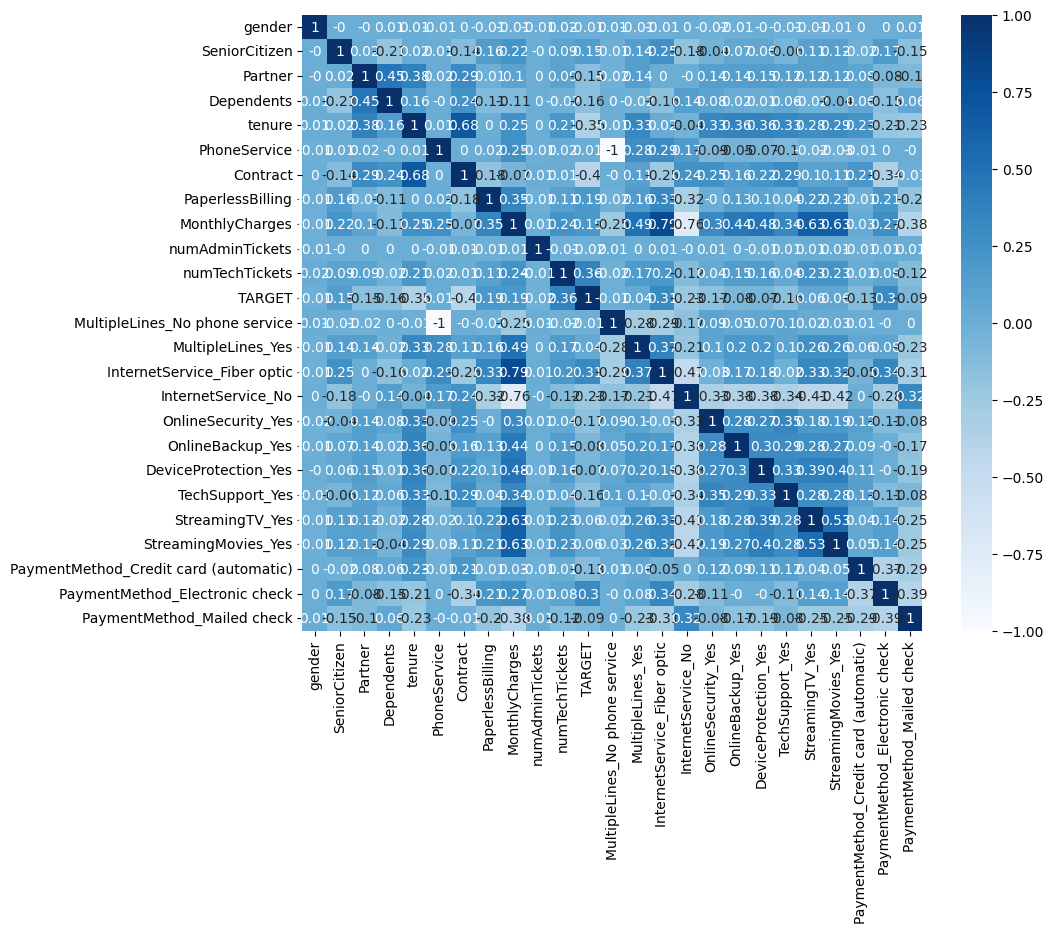

In [ ]:
## VERIFICACIÓN DE LA CORRELACIÓN ENTRE VARIABLES LUEGO DE LA ELIMINACIÓN DE COLUMNAS.

## NOTA: CÓDIGO EXTRAÍDO DEL "Taller Práctico: Clasificación, selección de modelos, optimización" - PROFESOR: MSc. Luis Muroya Tokushima.
##        CURSO: FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO. Sesión 04-10-2023.

import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df1.corr().apply(lambda x: round(x,2))
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,
            annot=True,
            cmap='Blues')
plt.show()

# **5. Selección del Modelo**

In [ ]:
## SEPARANDO EL DATASET EN VECTORES X e y

In [ ]:
X = df1.drop(columns='TARGET')
y = df1['TARGET']

In [ ]:
## SEPARANDO EL DATASET EN TRAIN, VAL Y TEST, PARTE 1

from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 30)

In [ ]:
## SEPARANDO EL DATASET EN TRAIN, VAL PARTE 2. (EL TEST YA NO SE TOCA)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size = 0.2, stratify = y_trainval, random_state = 30)

In [ ]:
print(y_train.count()/y.count(),y_val.count()/y.count(),y_test.count()/y.count())
print(y_train.count(),y_val.count(),y_test.count())

0.6399317406143344 0.1599829351535836 0.20008532423208192
4500 1125 1407


# `Se separaron los datos en 64% para "entrenamiento", 16% para "validación" , y 20% para "test".`

In [ ]:
## ESCALAMIENTO DE VARIABLES

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

# Notar que el scaler se fitea solo sobre el set de entrenamiento
X_train_sc = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_val_sc = pd.DataFrame(scaler.transform(X_val), columns = X_val.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,numAdminTickets,...,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2174,0,0,0,0,19,1,2,0,20.25,1,...,1,0,0,0,0,0,0,1,0,0
6553,0,0,1,1,61,0,3,1,61.45,0,...,0,0,1,1,1,1,1,0,0,0
4399,0,0,0,0,66,1,1,1,103.10,3,...,0,1,1,1,1,0,1,0,0,0
3784,1,1,0,0,35,1,1,1,101.40,0,...,0,0,0,1,0,1,1,0,1,0
3534,0,0,0,1,46,1,2,1,105.20,0,...,0,1,1,0,1,1,1,0,0,0


In [ ]:
X_train_sc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,numAdminTickets,...,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,0.0,0.0,0.253521,1.0,0.5,0.0,0.018454,0.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.845070,0.0,1.0,1.0,0.429426,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.915493,1.0,0.0,1.0,0.844888,0.6,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.478873,1.0,0.0,1.0,0.827930,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.633803,1.0,0.5,1.0,0.865835,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
## Entrenamiento de los 3 modelos

In [ ]:
## MODELO LOGISTICO

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)

LogisticRegression()

In [ ]:
## MODELO DE ÁRBOL

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_sc, y_train)

DecisionTreeClassifier()

In [ ]:
## MODELO DE BAYES

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_sc, y_train)

GaussianNB()

*Verificación de los modelos según las métricas de precisión, recall y AUC*


In [ ]:
from sklearn.metrics import precision_score

print(f'Precision - Naive Bayes {precision_score(y_val, nb.predict(X_val_sc)):.4f}')
print(f'Precision - Decision Tree: {precision_score(y_val, dt.predict(X_val_sc)):.4f}')
print(f'Precision - Logistic Regression: {precision_score(y_val, lr.predict(X_val_sc)):.4f}')

Precision - Naive Bayes 0.5731
Precision - Decision Tree: 0.6710
Precision - Logistic Regression: 0.7465


In [ ]:
from sklearn.metrics import recall_score

print(f'Recall - Naive Bayes {recall_score(y_val, nb.predict(X_val_sc)):.4f}')
print(f'Recall - Decision Tree: {recall_score(y_val, dt.predict(X_val_sc)):.4f}')
print(f'Recall - Logistic Regression: {recall_score(y_val, lr.predict(X_val_sc)):.4f}')

Recall - Naive Bayes 0.8127
Recall - Decision Tree: 0.6957
Recall - Logistic Regression: 0.7191


In [ ]:
from sklearn.metrics import roc_auc_score

print(f'AUC - Naive Bayes {roc_auc_score(y_val, nb.predict_proba(X_val_sc)[:,1]):.4f}')
print(f'AUC - Decision Tree: {roc_auc_score(y_val, dt.predict_proba(X_val_sc)[:,1]):.4f}')
print(f'AUC - Logistic Regression: {roc_auc_score(y_val, lr.predict_proba(X_val_sc)[:,1]):.4f}')

AUC - Naive Bayes 0.8794
AUC - Decision Tree: 0.7874
AUC - Logistic Regression: 0.9243


Desarrollo de la Matriz de Confusión de los modelos con mejores métricas:


*   Regresión Logística
*   Naive Bayes



In [ ]:
## CÓDIGO PARA CREAR UNA MATRÍZ DE CONFUSIÓN.

## NOTA: CÓDIGO EXTRAÍDO DEL "Taller Práctico: Clasificación, selección de modelos, optimización" - PROFESOR: MSc. Luis Muroya Tokushima.
##        CURSO: FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO. Sesión 04-10-2023.


def print_confusion_matrix(confusion_matrix, accuracy):
  import seaborn as sn
  plt.figure(figsize=(10,7))
  sn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion matrix. Acc={}'.format(accuracy))
  plt.show()

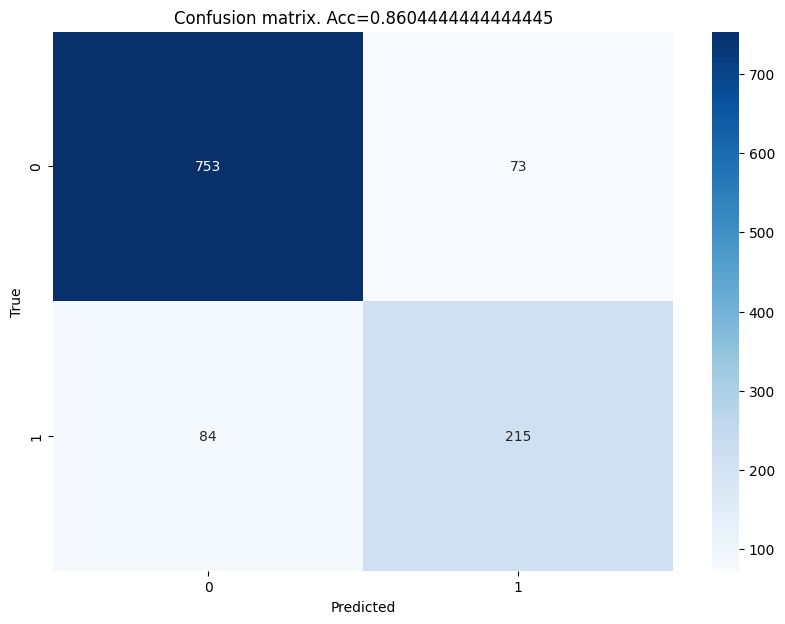

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print_confusion_matrix(confusion_matrix(y_val,lr.predict(X_val_sc)), accuracy_score(y_val,lr.predict(X_val_sc)))

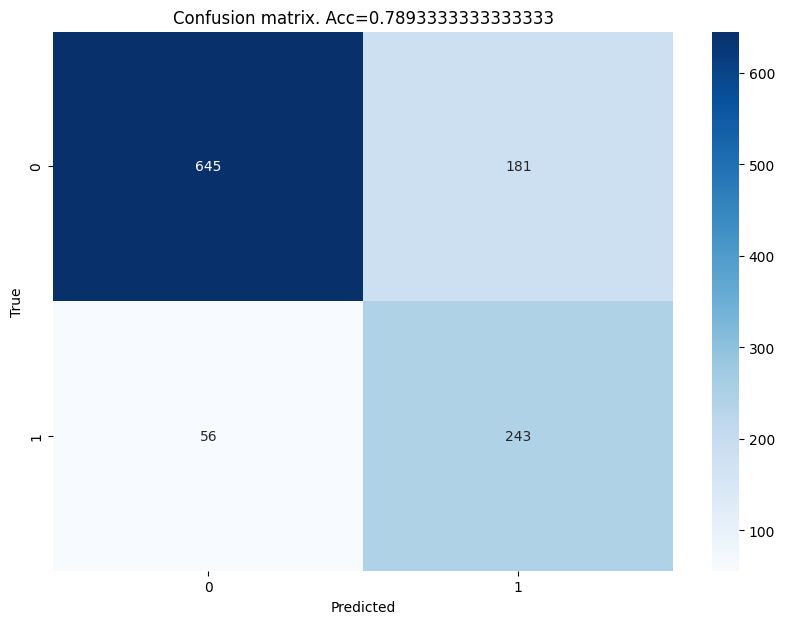

In [ ]:
## CODIGO PARA PLOTEAR UNA MATRIZ DE CONFUSIÓN.

## NOTA: CÓDIGO EXTRAÍDO DEL "Taller Práctico: Clasificación, selección de modelos, optimización" - PROFESOR: MSc. Luis Muroya Tokushima.
##        CURSO: FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO. Sesión 04-10-2023.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print_confusion_matrix(confusion_matrix(y_val,nb.predict(X_val_sc)), accuracy_score(y_val,nb.predict(X_val_sc)))

Se realizará una validación cruzada

In [ ]:
## CREACIÓN DE LOS PIPELINE PARA REALIZAR UNA VALIDACIÓN CRUZADA.

## NOTA: CÓDIGO EXTRAÍDO DEL "Taller Práctico: Clasificación, selección de modelos, optimización" - PROFESOR: MSc. Luis Muroya Tokushima.
##        CURSO: FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO. Sesión 04-10-2023.

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# El pipeline ejecuta cada paso que se indica de forma secuencial. En este caso, primero entrena el MinMaxScaler, aplica su función transform y el resultado
# pasa al método fit del clasificador.
pipeline_lr = Pipeline([('scaler', MinMaxScaler()),
                        ('lr', LogisticRegression(solver='liblinear'))])
pipeline_dt = Pipeline([('scaler', MinMaxScaler()),
                        ('dt', DecisionTreeClassifier())])

In [ ]:
pipeline_nb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('nb', GaussianNB())])

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(pipeline_lr, X_trainval, y_trainval, scoring = 'roc_auc', cv = 5)

array([0.91238349, 0.9083689 , 0.9286686 , 0.93172561, 0.92361949])

In [ ]:
## VERIFICACIÓN DE LAS MÉTRICAS PRECISIÓN, RECALL, AUC

from sklearn.model_selection import cross_val_score

lr_cross_precision = cross_val_score(pipeline_lr, X_trainval, y_trainval, scoring = 'precision', cv = 5).mean()
dt_cross_precision = cross_val_score(pipeline_dt, X_trainval, y_trainval, scoring = 'precision', cv = 5).mean()
nb_cross_precision = cross_val_score(pipeline_nb, X_trainval, y_trainval, scoring = 'precision', cv = 5).mean()

print(f'Precision - Logistic Regression: {lr_cross_precision:.4f}')
print(f'Precision - Decision Tree: {dt_cross_precision:.4f}')
print(f'Precision - Naive Bayes: {nb_cross_precision:.4f}')

print('')

lr_cross_recall = cross_val_score(pipeline_lr, X_trainval, y_trainval, scoring = 'recall', cv = 5).mean()
dt_cross_recall = cross_val_score(pipeline_dt, X_trainval, y_trainval, scoring = 'recall', cv = 5).mean()
nb_cross_recall = cross_val_score(pipeline_nb, X_trainval, y_trainval, scoring = 'recall', cv = 5).mean()

print(f'Recall - Logistic Regression: {lr_cross_recall:.4f}')
print(f'Recall - Decision Tree: {dt_cross_recall:.4f}')
print(f'Recall - Naive Bayes: {nb_cross_recall:.4f}')

print('')

lr_cross_auc = cross_val_score(pipeline_lr, X_trainval, y_trainval, scoring = 'roc_auc', cv = 5).mean()
dt_cross_auc = cross_val_score(pipeline_dt, X_trainval, y_trainval, scoring = 'roc_auc', cv = 5).mean()
nb_cross_auc = cross_val_score(pipeline_nb, X_trainval, y_trainval, scoring = 'roc_auc', cv = 5).mean()

print(f'AUC - Logistic Regression: {lr_cross_auc:.4f}')
print(f'AUC - Decision Tree: {dt_cross_auc:.4f}')
print(f'AUC - Naive Bayes: {nb_cross_auc:.4f}')

Precision - Logistic Regression: 0.7558
Precision - Decision Tree: 0.6404
Precision - Naive Bayes: 0.5898

Recall - Logistic Regression: 0.7077
Recall - Decision Tree: 0.6482
Recall - Naive Bayes: 0.8000

AUC - Logistic Regression: 0.9210
AUC - Decision Tree: 0.7555
AUC - Naive Bayes: 0.8766


Nota: Se observa que realizando el entremiento del modelo tanto con escalamiento o con validación cruzada las métricas son similares.



```
Debido a que se requiere predecir la mayor cantidad de positivos verdaderos
(TP) respecto a todos los positivos reales, se toma como métrica más adecuada
para el "Recall". De acuerdo a lo observado se optimizarán los parámetros de
los modelos de naive bayes y regresión logística para escoger el modelo con la
métrica más alta. Mayor detalle en el informe.
```



# **6. Optimización de hiperparámetros Naive-Bayes**



In [ ]:
## OPTIMIZACIÓN DE HIPERPARAMETROS 'VAR_SMOOTHIN' CON EL OBJETIVO DE MEJORAR EL RECALL.

## NOTA: CÓDIGO EXTRAÍDO Y ADAPTADO DE CHATGPT PROMPT: DETALLE DE CODIGO PARA OPTIMIZAR HIPERPARAMETROS NAIVE-BAYES

from sklearn.model_selection import GridSearchCV

param_grid = {'var_smoothing': [1e-11, 1e-9, 1e-7]}  # Definir diferentes valores para var_smoothing

grid_clf = GridSearchCV(nb, param_grid, scoring='recall',cv=5)
grid_clf.fit(X_train, y_train)

best_params = grid_clf.best_params_


In [ ]:
best_params

{'var_smoothing': 1e-11}

In [ ]:
# Podemos encontrar el mejor score obtenido con estos parametros
grid_clf.best_score_

0.7943305439330544

In [ ]:
## NOTA: CÓDIGO EXTRAÍDO DEL "Taller Práctico: Clasificación, selección de modelos, optimización" - PROFESOR: MSc. Luis Muroya Tokushima.
##        CURSO: FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO. Sesión 04-10-2023.

# Código obtenido de la documentación de sklearn
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,
                       scoring = 'recall')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

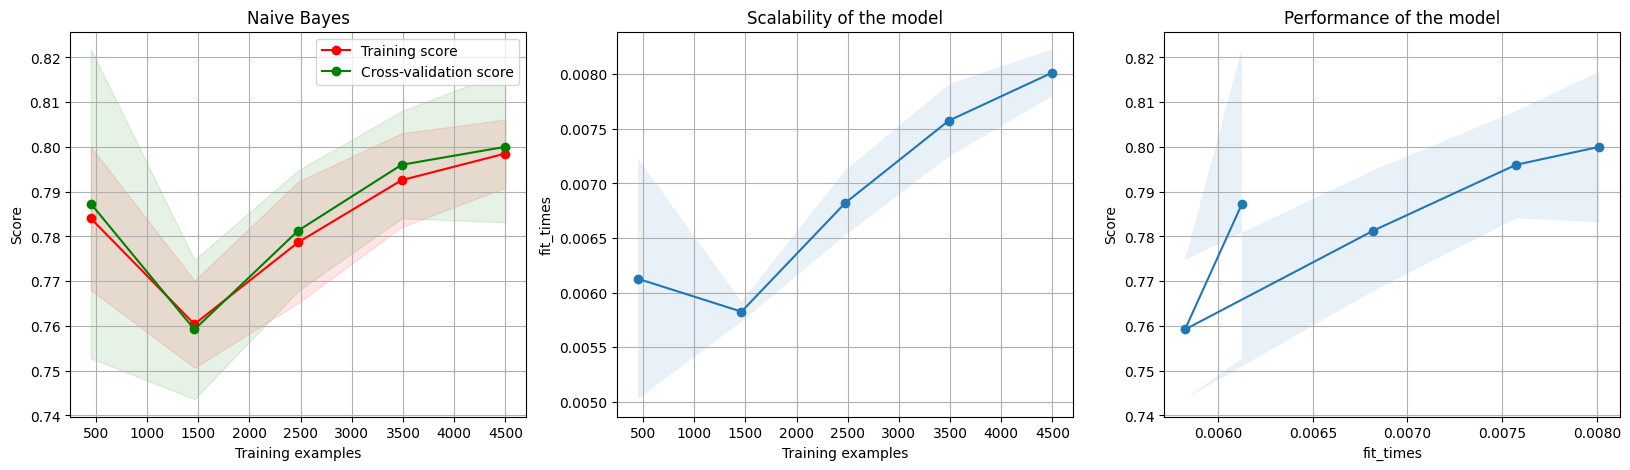

In [ ]:
estimator = Pipeline([('scaler', MinMaxScaler()),
                      ('clf', GaussianNB(var_smoothing= 1e-11))])
plot_learning_curve(estimator, 'Naive Bayes', X_trainval, y_trainval, cv=5)
plt.show()

In [ ]:
# Entrenamos el scaler con toda la data de entrenamiento
scaler = MinMaxScaler()
scaler.fit(X_trainval)
X_trainval_sc = scaler.transform(X_trainval)
X_test_sc = scaler.transform(X_test)

# Entrenamos el clasificador con toda la data de entrenamiento
clf_final = GaussianNB(var_smoothing= 1e-7)
clf_final.fit(X_trainval_sc, y_trainval)

y_pred = clf_final.predict(X_test_sc)
y_pred_proba = clf_final.predict_proba(X_test_sc)[:,1]

print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'AUC: {roc_auc_score(y_test, y_pred_proba)}')

Precision: 0.5915492957746479
Recall: 0.786096256684492
AUC: 0.8712643202136967


In [ ]:
## VERIFICACIÓN DE LAS METRICAS SIN LA OPTIMIZACIÓN PARA COMPARAR CON LAS MÉTRICAS OBTENIDAS ARRIBA (NAIVE BAYES)

from sklearn.metrics import precision_score

print(f'Recall - Naive Bayes {recall_score(y_val, nb.predict(X_val_sc)):.4f}')
print(f'Recall - Decision Tree: {recall_score(y_val, dt.predict(X_val_sc)):.4f}')
print(f'Recall - Logistic Regression: {recall_score(y_val, lr.predict(X_val_sc)):.4f}')

Recall - Naive Bayes 0.8127
Recall - Decision Tree: 0.6957
Recall - Logistic Regression: 0.7191


Revisando el modelo de regresión logística y la métrica de Recall



---------------------------------------------------------

# **7. Optimización de hiperparámetros Regresión Logística**

In [ ]:
class_weight_lst = [None, 'balanced']
C_lst = [10, 1, 0.1, 0.01]

param_grid = {
    # El nombre del parametro sigue el patron: <nombre_paso_pipeline>__<nombre_parametros_documentacion>
    'lr__class_weight': class_weight_lst,
    'lr__C': C_lst
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(pipeline_lr, param_grid = param_grid, scoring = 'recall', cv = 5)
grid_clf.fit(X_train_sc, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('lr',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'lr__C': [10, 1, 0.1, 0.01],
                         'lr__class_weight': [None, 'balanced']},
             scoring='recall')

In [ ]:
grid_clf.best_params_

{'lr__C': 10, 'lr__class_weight': 'balanced'}

In [ ]:
# Podemos encontrar el mejor score obtenido con estos parametros
grid_clf.best_score_

0.8679009762900977

In [ ]:
# Código obtenido de la documentación de sklearn
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,
                       scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

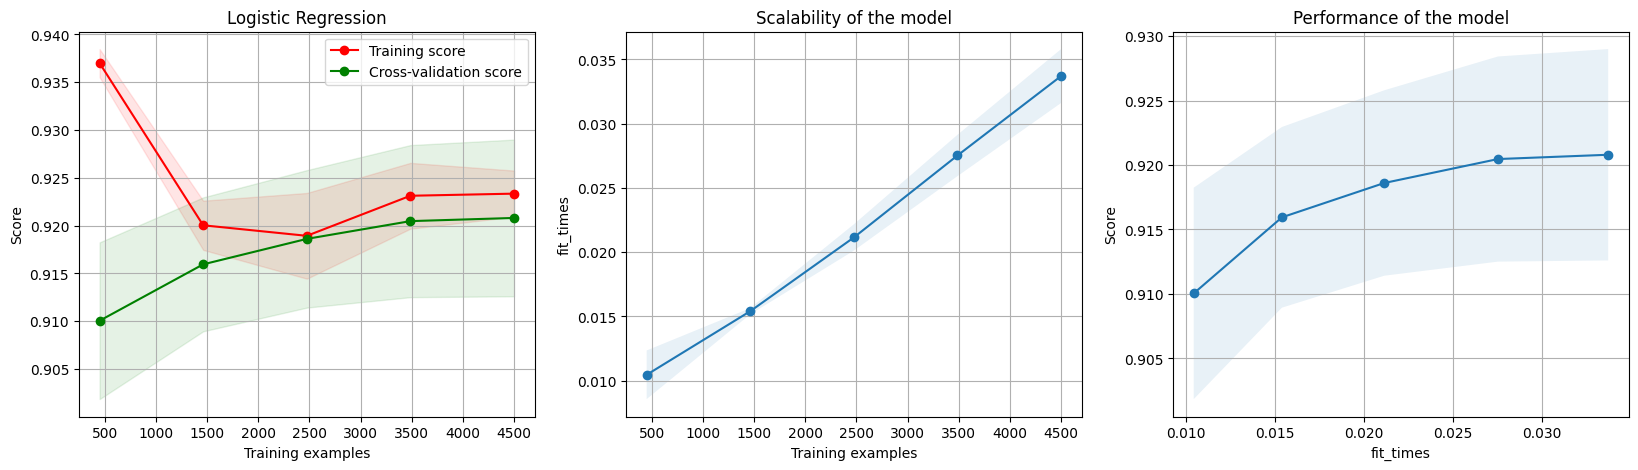

In [ ]:
estimator = Pipeline([('scaler', MinMaxScaler()),
                      ('clf', LogisticRegression(solver = 'liblinear', C=10, class_weight='balanced'))])
plot_learning_curve(estimator, 'Logistic Regression', X_trainval, y_trainval, cv=5)
plt.show()

In [ ]:
# Entrenamos el scaler con toda la data de entrenamiento
scaler = MinMaxScaler()
scaler.fit(X_trainval)
X_trainval_sc = scaler.transform(X_trainval)
X_test_sc = scaler.transform(X_test)

# Entrenamos el clasificador con toda la data de entrenamiento
clf_final = LogisticRegression(solver = 'liblinear', C=10, class_weight = 'balanced')
clf_final.fit(X_trainval_sc, y_trainval)

y_pred = clf_final.predict(X_test_sc)
y_pred_proba = clf_final.predict_proba(X_test_sc)[:,1]

print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'AUC: {roc_auc_score(y_test, y_pred_proba)}')

Precision: 0.6205607476635514
Recall: 0.8877005347593583
AUC: 0.9231561673336061


**CONCLUSIÓN: SE OBSERVA QUE LA MÉTRICA DE RECALL ES MAYOR PARA REGRESIÓN LOGÍSTICA QUE PARA NAIVE-BAYES DESPUES DE LA OPTIMIZACIÓN DE HIPERPARAMETROS. POR LO TANTO, PARA NUESTRO CASO SE TOMARÍA LA REGRESIÓN LOGISTICA COMO MODELO Y LA MÉTRICA DE RECALL PARA EVALUACIÓN**

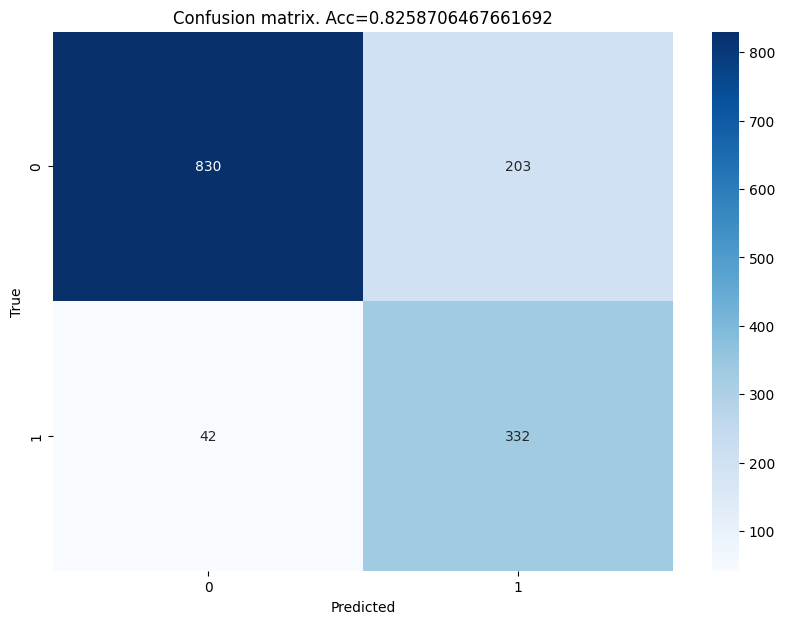

In [ ]:
print_confusion_matrix(confusion_matrix(y_test,clf_final.predict(X_test_sc)), accuracy_score(y_test,clf_final.predict(X_test_sc)))

Verificando la importancia de las variables en la regresión logística.

Text(0.5, 1.0, 'Importancia de variables para el clasificador')

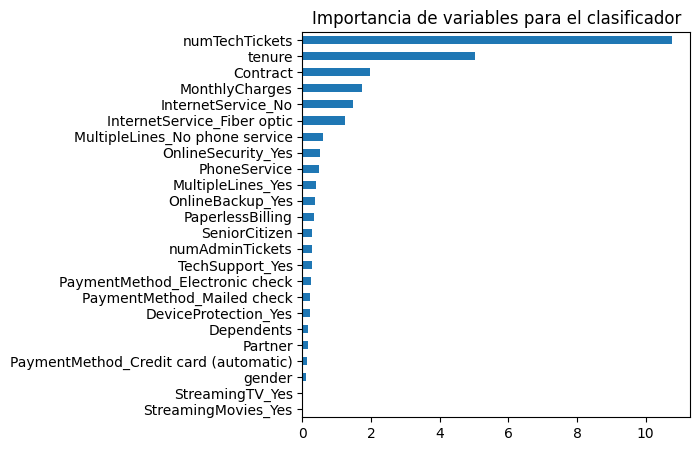

In [ ]:
plt.figure(figsize=(5,5))
# Para metodos lineales, como Regresion Logistica, usamos clf.coef_.
# Otros metodos -como arboles- tienen el atributo feature_importances_
df_importancias = pd.DataFrame.from_dict({x:abs(y) for x,y in zip(X_trainval.columns,clf_final.coef_[0])}, orient='index', columns=['Importancia'])
df_importancias = df_importancias.sort_values(by='Importancia', ascending=True)
df_importancias.Importancia.plot(kind='barh')
plt.title('Importancia de variables para el clasificador')

In [ ]:
base_scoreada = X_test.copy(deep=True)
base_scoreada['PROB'] = y_pred_proba
base_scoreada['GRUPO'] = pd.qcut(base_scoreada['PROB'], 5, labels=['Muy Baja','Baja','Media','Alta','Muy Alta'])
base_scoreada['CONTADOR'] = 1
base_scoreada['CHURN'] = y_test

In [ ]:
base_scoreada.groupby('GRUPO')['PROB'].describe()

,count,mean,std,min,25%,50%,75%,max
GRUPO,,,,,,,,
Muy Baja,282.0,0.002541,0.001914,0.000310,0.000950,0.001825,0.003849,0.007135
Baja,281.0,0.035361,0.023192,0.007218,0.013770,0.030266,0.054631,0.084659
Media,281.0,0.255036,0.109946,0.084937,0.160335,0.238790,0.355191,0.450003
Alta,281.0,0.633013,0.095671,0.450413,0.547000,0.642373,0.711707,0.786845
Muy Alta,282.0,0.899571,0.058770,0.788559,0.852756,0.899781,0.946045,0.999720


In [ ]:
pivot = pd.pivot_table(base_scoreada, values='CONTADOR', index='GRUPO', columns='CHURN', aggfunc=np.sum).fillna(0)

# Recordar 0=No Churn, 1=Churn
pivot.columns = ['No_churn','Churn']
pivot['Total'] = pivot['Churn'] + pivot['No_churn']
pivot['Pct'] = pivot['Churn']/pivot['Total']

In [ ]:
mean_pct = pivot['Pct'].mean()
pivot['Lift'] = pivot['Pct']/mean_pct

In [ ]:
pivot

,No_churn,Churn,Total,Pct,Lift
GRUPO,,,,,
Muy Baja,282,0,282,0.000000,0.000000
Baja,278,3,281,0.010676,0.040193
Media,249,32,281,0.113879,0.428726
Alta,168,113,281,0.402135,1.513939
Muy Alta,56,226,282,0.801418,3.017141


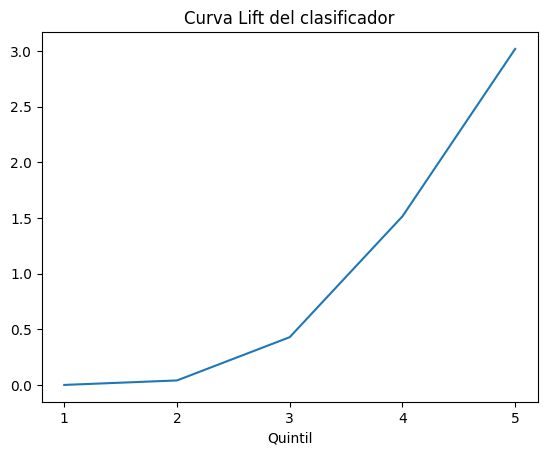

In [ ]:
plt.plot(range(1,6), pivot['Lift'])
plt.xlabel('Quintil')
plt.title('Curva Lift del clasificador')
plt.xticks([1,2,3,4,5])
plt.show()

In [ ]:
## SE GUARDA EL MODELO CON EL NOMBRE "modelo_final (regresión logistica optimizado los hiperparámetros)"

import pickle

with open('modelo_final', 'wb') as file:
  pickle.dump(clf_final, file)